#                                                   Inflation Dynamics in India (2013–2025)               

# Introduction

Inflation is one of the most significant indicators of an economy’s health, influencing purchasing power, production costs, investment decisions, and the overall growth trajectory. In India, inflation is primarily measured through two indices — the Consumer Price Index (CPI), which captures changes in retail prices, and the Wholesale Price Index (WPI), which tracks price movements at the wholesale level.

The study began with data cleaning, transformation, and reshaping of multiple datasets (CPI, WPI, Repo Rate) to ensure consistency in date formats, proper labeling of categories, and handling of missing values. After this preprocessing, detailed Exploratory Data Analysis (EDA) was conducted to uncover key patterns and relationships. Each visualization and metric helped interpret India’s inflation structure more comprehensively.

# Objective

This project aims to analyzes India’s inflation trends using CPI and WPI data along with the RBI Repo Rate, to understand how inflation has evolved over time and how monetary policy has responded to these changes. The analysis also explores how inflation behaves across different dimensions — such as urban vs rural, food vs non-food, and category-wise inflation trends — while highlighting the effects of major macroeconomic shocks like Demonetization (2016), GST implementation (2017), COVID-19 pandemic (2020–21), and the Russia–Ukraine War (2022).

In [18]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [20]:
# Loading CPI Data

In [22]:
cpi = pd.read_csv("C:/Users/Admin/Downloads/CPI.csv")

In [24]:
cpi

,Month,DATE,Commodity Description,Rural Index,Urban Index,Combined Index
0,Jul-25,2025-07,General Index,197.6,194.2,196.0
1,Jul-25,2025-07,Food & beverages,198.4,207.0,201.6
2,Jul-25,2025-07,Clothing and footwear,201.3,190.8,197.1
3,Jul-25,2025-07,Housing,-,185.7,185.7
4,Jul-25,2025-07,Fuel and light,184,175.2,180.7
...,...,...,...,...,...,...
901,Jan-13,2013-01,Food & beverages,105.5,105.9,105.6
902,Jan-13,2013-01,Clothing and footwear,106.4,105.8,106.2
903,Jan-13,2013-01,Housing,-,100.3,100.3
904,Jan-13,2013-01,Fuel and light,105.5,105.4,105.5


In [26]:
# Reshaping Cpi

In [28]:
CPI = cpi.melt(
    id_vars=["Month", "Commodity Description"],
    value_vars=["Rural Index", "Urban Index", "Combined Index"],
    var_name="geo",
    value_name="index"
)

In [30]:
CPI

,Month,Commodity Description,geo,index
0,Jul-25,General Index,Rural Index,197.6
1,Jul-25,Food & beverages,Rural Index,198.4
2,Jul-25,Clothing and footwear,Rural Index,201.3
3,Jul-25,Housing,Rural Index,-
4,Jul-25,Fuel and light,Rural Index,184
...,...,...,...,...
2713,Jan-13,Food & beverages,Combined Index,105.6
2714,Jan-13,Clothing and footwear,Combined Index,106.2
2715,Jan-13,Housing,Combined Index,100.3
2716,Jan-13,Fuel and light,Combined Index,105.5


In [32]:
CPI.rename(columns={"Commodity Description": "category"}, inplace=True)
CPI["geo"] = CPI["geo"].str.replace(" Index", "")

In [34]:
CPI

,Month,category,geo,index
0,Jul-25,General Index,Rural,197.6
1,Jul-25,Food & beverages,Rural,198.4
2,Jul-25,Clothing and footwear,Rural,201.3
3,Jul-25,Housing,Rural,-
4,Jul-25,Fuel and light,Rural,184
...,...,...,...,...
2713,Jan-13,Food & beverages,Combined,105.6
2714,Jan-13,Clothing and footwear,Combined,106.2
2715,Jan-13,Housing,Combined,100.3
2716,Jan-13,Fuel and light,Combined,105.5


In [36]:
# Converting Month into Date Format

In [38]:
CPI["Month"] = pd.to_datetime(CPI["Month"], format="%b-%y")

In [40]:
CPI

,Month,category,geo,index
0,2025-07-01,General Index,Rural,197.6
1,2025-07-01,Food & beverages,Rural,198.4
2,2025-07-01,Clothing and footwear,Rural,201.3
3,2025-07-01,Housing,Rural,-
4,2025-07-01,Fuel and light,Rural,184
...,...,...,...,...
2713,2013-01-01,Food & beverages,Combined,105.6
2714,2013-01-01,Clothing and footwear,Combined,106.2
2715,2013-01-01,Housing,Combined,100.3
2716,2013-01-01,Fuel and light,Combined,105.5


In [42]:
CPI = CPI.sort_values(["category", "geo", "Month"]).reset_index(drop=True)

In [44]:
CPI

,Month,category,geo,index
0,2013-01-01,Clothing and footwear,Combined,106.2
1,2013-02-01,Clothing and footwear,Combined,106.8
2,2013-03-01,Clothing and footwear,Combined,107.3
3,2013-04-01,Clothing and footwear,Combined,107.9
4,2013-05-01,Clothing and footwear,Combined,108.5
...,...,...,...,...
2713,2025-03-01,Miscellaneous,Urban,184.6
2714,2025-04-01,Miscellaneous,Urban,185.6
2715,2025-05-01,Miscellaneous,Urban,186.3
2716,2025-06-01,Miscellaneous,Urban,187.4


In [46]:
# Converting index to numeric and handle missing values

In [48]:
CPI.isna().sum()

Month       0
category    0
geo         0
index       0
dtype: int64

In [50]:
CPI["index"] = pd.to_numeric(CPI["index"], errors="coerce")

In [52]:
CPI = CPI.sort_values(["category","geo","Month"]).reset_index(drop=True)


In [54]:
CPI["index"] = CPI.groupby(["category","geo"])["index"].ffill()
CPI["index"] = CPI.groupby(["category","geo"])["index"].bfill()

In [56]:
CPI.isna().sum()

Month         0
category      0
geo           0
index       151
dtype: int64

In [58]:
CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     2718 non-null   datetime64[ns]
 1   category  2718 non-null   object        
 2   geo       2718 non-null   object        
 3   index     2567 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 85.1+ KB


In [60]:
CPI[CPI["index"].isna()]

,Month,category,geo,index
1963,2013-01-01,Housing,Rural,NaN
1964,2013-02-01,Housing,Rural,NaN
1965,2013-03-01,Housing,Rural,NaN
1966,2013-04-01,Housing,Rural,NaN
1967,2013-05-01,Housing,Rural,NaN
...,...,...,...,...
2109,2025-03-01,Housing,Rural,NaN
2110,2025-04-01,Housing,Rural,NaN
2111,2025-05-01,Housing,Rural,NaN
2112,2025-06-01,Housing,Rural,NaN


In [62]:
CPI[(CPI.category == 'Housing') & (CPI.geo == 'Rural')]

,Month,category,geo,index
1963,2013-01-01,Housing,Rural,NaN
1964,2013-02-01,Housing,Rural,NaN
1965,2013-03-01,Housing,Rural,NaN
1966,2013-04-01,Housing,Rural,NaN
1967,2013-05-01,Housing,Rural,NaN
...,...,...,...,...
2109,2025-03-01,Housing,Rural,NaN
2110,2025-04-01,Housing,Rural,NaN
2111,2025-05-01,Housing,Rural,NaN
2112,2025-06-01,Housing,Rural,NaN


In [64]:
CPI = CPI.drop(CPI[(CPI.category == 'Housing') & (CPI.geo == 'Rural')].index,axis = 0).reset_index(drop=True)

In [66]:
CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     2567 non-null   datetime64[ns]
 1   category  2567 non-null   object        
 2   geo       2567 non-null   object        
 3   index     2567 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 80.3+ KB


In [68]:
CPI = CPI.sort_values(["category","geo","Month"]).reset_index(drop=True)

In [70]:
# Computing MoM & YoY Inflation

In [72]:
CPI["mom"] = CPI.groupby(["category","geo"])["index"].pct_change(1) * 100
CPI["yoy"] = CPI.groupby(["category","geo"])["index"].pct_change(12) * 100

In [74]:
CPI

,Month,category,geo,index,mom,yoy
0,2013-01-01,Clothing and footwear,Combined,106.2,NaN,NaN
1,2013-02-01,Clothing and footwear,Combined,106.8,0.564972,NaN
2,2013-03-01,Clothing and footwear,Combined,107.3,0.468165,NaN
3,2013-04-01,Clothing and footwear,Combined,107.9,0.559180,NaN
4,2013-05-01,Clothing and footwear,Combined,108.5,0.556070,NaN
...,...,...,...,...,...,...
2562,2025-03-01,Miscellaneous,Urban,184.6,0.435256,4.886364
2563,2025-04-01,Miscellaneous,Urban,185.6,0.541712,4.977376
2564,2025-05-01,Miscellaneous,Urban,186.3,0.377155,5.076142
2565,2025-06-01,Miscellaneous,Urban,187.4,0.590446,5.340079


In [76]:
CPI["index"] = CPI["index"].round(2)
CPI["mom"] = CPI["mom"].round(2)
CPI["yoy"] = CPI["yoy"].round(2)

In [78]:
CPI

,Month,category,geo,index,mom,yoy
0,2013-01-01,Clothing and footwear,Combined,106.2,NaN,NaN
1,2013-02-01,Clothing and footwear,Combined,106.8,0.56,NaN
2,2013-03-01,Clothing and footwear,Combined,107.3,0.47,NaN
3,2013-04-01,Clothing and footwear,Combined,107.9,0.56,NaN
4,2013-05-01,Clothing and footwear,Combined,108.5,0.56,NaN
...,...,...,...,...,...,...
2562,2025-03-01,Miscellaneous,Urban,184.6,0.44,4.89
2563,2025-04-01,Miscellaneous,Urban,185.6,0.54,4.98
2564,2025-05-01,Miscellaneous,Urban,186.3,0.38,5.08
2565,2025-06-01,Miscellaneous,Urban,187.4,0.59,5.34


In [80]:
CPI.to_csv("cpi_long.csv", index=False)

In [82]:
CPI_headline = CPI[(CPI["geo"]=="Combined") & (CPI["category"]=="General Index")].copy()

In [84]:
CPI_headline = CPI_headline[["Month","index","mom","yoy"]].rename(
    columns={"index":"cpi_index","mom":"cpi_mom","yoy":"cpi_yoy"}
)

In [86]:
CPI_headline.to_csv("cpi_headline.csv", index=False)


In [88]:
CPI_headline

,Month,cpi_index,cpi_mom,cpi_yoy
1359,2013-01-01,104.6,NaN,NaN
1360,2013-02-01,105.3,0.67,NaN
1361,2013-03-01,105.5,0.19,NaN
1362,2013-04-01,106.1,0.57,NaN
1363,2013-05-01,106.9,0.75,NaN
...,...,...,...,...
1505,2025-03-01,192.0,-0.26,3.34
1506,2025-04-01,192.6,0.31,3.16
1507,2025-05-01,193.0,0.21,2.82
1508,2025-06-01,194.2,0.62,2.10


In [90]:
# Loading WPI Data

In [92]:
wpi = pd.read_csv("C:/Users/Admin/Desktop/“India’s Inflation Drivers and Monetary Policy Response (2013–2025)”/WPI.csv")

In [94]:
wpi

,COMMODITIES,INDX012013,INDX022013,INDX032013,INDX042013,INDX052013,INDX062013,INDX072013,INDX082013,INDX092013,...,INDX102024,INDX112024,INDX122024,INDX012025,INDX022025,INDX032025,INDX042025,INDX052025,INDX062025,INDX072025
0,NaN,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07
1,All commodities,108,108.4,108.6,108.6,108.6,110.1,111.2,112.9,114.3,...,156.7,156.4,155.7,155,154.9,154.8,154.2,153.7,153.7,154.4
2,Food Articles,113.2,113.9,113.5,114.7,117.8,122.2,123.6,128.2,128.5,...,217.9,213.7,207.5,199.8,195.9,194.8,197.4,196.8,198,199.7
3,Fuel & Power,108.9,109.8,109.8,108,105.2,107.9,112,114.2,119.2,...,148.8,149.9,151.8,152,153.4,152.1,145.7,142.9,142.3,144.6
4,Manufactured Products,105.8,105.8,106.2,106.5,106.4,106.8,107.4,108.1,109.1,...,142.9,143.1,143,143.4,144,144.6,144.9,145,144.7,144.6


In [96]:
# Reshaping WPI

In [98]:
wpi = wpi.iloc[1:].reset_index(drop=True)


In [100]:
wpi 

,COMMODITIES,INDX012013,INDX022013,INDX032013,INDX042013,INDX052013,INDX062013,INDX072013,INDX082013,INDX092013,...,INDX102024,INDX112024,INDX122024,INDX012025,INDX022025,INDX032025,INDX042025,INDX052025,INDX062025,INDX072025
0,All commodities,108,108.4,108.6,108.6,108.6,110.1,111.2,112.9,114.3,...,156.7,156.4,155.7,155,154.9,154.8,154.2,153.7,153.7,154.4
1,Food Articles,113.2,113.9,113.5,114.7,117.8,122.2,123.6,128.2,128.5,...,217.9,213.7,207.5,199.8,195.9,194.8,197.4,196.8,198,199.7
2,Fuel & Power,108.9,109.8,109.8,108,105.2,107.9,112,114.2,119.2,...,148.8,149.9,151.8,152,153.4,152.1,145.7,142.9,142.3,144.6
3,Manufactured Products,105.8,105.8,106.2,106.5,106.4,106.8,107.4,108.1,109.1,...,142.9,143.1,143,143.4,144,144.6,144.9,145,144.7,144.6


In [102]:
keep_map = {
    "All commodities": "All Commodities",
    "Food Articles": "Food Articles",
    "Fuel & Power": "Fuel & Power",
    "Manufactured Products": "Manufactured Products"
}

In [104]:
keep_map

{'All commodities': 'All Commodities',
 'Food Articles': 'Food Articles',
 'Fuel & Power': 'Fuel & Power',
 'Manufactured Products': 'Manufactured Products'}

In [106]:
wpi = wpi[wpi["COMMODITIES"].isin(keep_map.keys())].copy()

In [108]:
wpi

,COMMODITIES,INDX012013,INDX022013,INDX032013,INDX042013,INDX052013,INDX062013,INDX072013,INDX082013,INDX092013,...,INDX102024,INDX112024,INDX122024,INDX012025,INDX022025,INDX032025,INDX042025,INDX052025,INDX062025,INDX072025
0,All commodities,108,108.4,108.6,108.6,108.6,110.1,111.2,112.9,114.3,...,156.7,156.4,155.7,155,154.9,154.8,154.2,153.7,153.7,154.4
1,Food Articles,113.2,113.9,113.5,114.7,117.8,122.2,123.6,128.2,128.5,...,217.9,213.7,207.5,199.8,195.9,194.8,197.4,196.8,198,199.7
2,Fuel & Power,108.9,109.8,109.8,108,105.2,107.9,112,114.2,119.2,...,148.8,149.9,151.8,152,153.4,152.1,145.7,142.9,142.3,144.6
3,Manufactured Products,105.8,105.8,106.2,106.5,106.4,106.8,107.4,108.1,109.1,...,142.9,143.1,143,143.4,144,144.6,144.9,145,144.7,144.6


In [110]:
wpi["category"] = wpi["COMMODITIES"].map(keep_map)

In [112]:
wpi

,COMMODITIES,INDX012013,INDX022013,INDX032013,INDX042013,INDX052013,INDX062013,INDX072013,INDX082013,INDX092013,...,INDX112024,INDX122024,INDX012025,INDX022025,INDX032025,INDX042025,INDX052025,INDX062025,INDX072025,category
0,All commodities,108,108.4,108.6,108.6,108.6,110.1,111.2,112.9,114.3,...,156.4,155.7,155,154.9,154.8,154.2,153.7,153.7,154.4,All Commodities
1,Food Articles,113.2,113.9,113.5,114.7,117.8,122.2,123.6,128.2,128.5,...,213.7,207.5,199.8,195.9,194.8,197.4,196.8,198,199.7,Food Articles
2,Fuel & Power,108.9,109.8,109.8,108,105.2,107.9,112,114.2,119.2,...,149.9,151.8,152,153.4,152.1,145.7,142.9,142.3,144.6,Fuel & Power
3,Manufactured Products,105.8,105.8,106.2,106.5,106.4,106.8,107.4,108.1,109.1,...,143.1,143,143.4,144,144.6,144.9,145,144.7,144.6,Manufactured Products


In [114]:
month_cols = [c for c in wpi.columns if re.fullmatch(r"INDX\d{6}", c)]

In [116]:
WPI = wpi.melt(
    id_vars=["category"],
    value_vars=month_cols,
    var_name="raw_month",
    value_name="index"
)

In [118]:
WPI

,category,raw_month,index
0,All Commodities,INDX012013,108
1,Food Articles,INDX012013,113.2
2,Fuel & Power,INDX012013,108.9
3,Manufactured Products,INDX012013,105.8
4,All Commodities,INDX022013,108.4
...,...,...,...
599,Manufactured Products,INDX062025,144.7
600,All Commodities,INDX072025,154.4
601,Food Articles,INDX072025,199.7
602,Fuel & Power,INDX072025,144.6


In [120]:
def extract_date(raw):
    mm = int(raw[4:6])
    yyyy = int(raw[6:10])
    return pd.Timestamp(year=yyyy, month=mm, day=1)

In [122]:
WPI["Month"] = WPI["raw_month"].apply(extract_date)

In [124]:
WPI

,category,raw_month,index,Month
0,All Commodities,INDX012013,108,2013-01-01
1,Food Articles,INDX012013,113.2,2013-01-01
2,Fuel & Power,INDX012013,108.9,2013-01-01
3,Manufactured Products,INDX012013,105.8,2013-01-01
4,All Commodities,INDX022013,108.4,2013-02-01
...,...,...,...,...
599,Manufactured Products,INDX062025,144.7,2025-06-01
600,All Commodities,INDX072025,154.4,2025-07-01
601,Food Articles,INDX072025,199.7,2025-07-01
602,Fuel & Power,INDX072025,144.6,2025-07-01


In [126]:
WPI["month"] = WPI["Month"].dt.strftime("%Y-%m")

In [128]:
WPI

,category,raw_month,index,Month,month
0,All Commodities,INDX012013,108,2013-01-01,2013-01
1,Food Articles,INDX012013,113.2,2013-01-01,2013-01
2,Fuel & Power,INDX012013,108.9,2013-01-01,2013-01
3,Manufactured Products,INDX012013,105.8,2013-01-01,2013-01
4,All Commodities,INDX022013,108.4,2013-02-01,2013-02
...,...,...,...,...,...
599,Manufactured Products,INDX062025,144.7,2025-06-01,2025-06
600,All Commodities,INDX072025,154.4,2025-07-01,2025-07
601,Food Articles,INDX072025,199.7,2025-07-01,2025-07
602,Fuel & Power,INDX072025,144.6,2025-07-01,2025-07


In [130]:
WPI.value_counts("index")

index
112.6    6
109.2    5
109.9    5
117.8    5
118.3    4
        ..
134.5    1
134      1
133.7    1
133.6    1
99.5     1
Name: count, Length: 413, dtype: int64

In [132]:
print(WPI["index"].dtype)

object


In [134]:
WPI["index"].astype(str).str.contains(",").any()

False

In [136]:
WPI["index"] = pd.to_numeric(WPI["index"], errors="coerce")

In [138]:
WPI

,category,raw_month,index,Month,month
0,All Commodities,INDX012013,108.0,2013-01-01,2013-01
1,Food Articles,INDX012013,113.2,2013-01-01,2013-01
2,Fuel & Power,INDX012013,108.9,2013-01-01,2013-01
3,Manufactured Products,INDX012013,105.8,2013-01-01,2013-01
4,All Commodities,INDX022013,108.4,2013-02-01,2013-02
...,...,...,...,...,...
599,Manufactured Products,INDX062025,144.7,2025-06-01,2025-06
600,All Commodities,INDX072025,154.4,2025-07-01,2025-07
601,Food Articles,INDX072025,199.7,2025-07-01,2025-07
602,Fuel & Power,INDX072025,144.6,2025-07-01,2025-07


In [140]:
print(WPI["index"].dtype)

float64


In [142]:
WPI = WPI.query("Month >= '2013-01-01' and Month <= '2025-07-01'")
WPI = WPI.sort_values(["category","Month"]).reset_index(drop=True)

In [144]:
WPI

,category,raw_month,index,Month,month
0,All Commodities,INDX012013,108.0,2013-01-01,2013-01
1,All Commodities,INDX022013,108.4,2013-02-01,2013-02
2,All Commodities,INDX032013,108.6,2013-03-01,2013-03
3,All Commodities,INDX042013,108.6,2013-04-01,2013-04
4,All Commodities,INDX052013,108.6,2013-05-01,2013-05
...,...,...,...,...,...
599,Manufactured Products,INDX032025,144.6,2025-03-01,2025-03
600,Manufactured Products,INDX042025,144.9,2025-04-01,2025-04
601,Manufactured Products,INDX052025,145.0,2025-05-01,2025-05
602,Manufactured Products,INDX062025,144.7,2025-06-01,2025-06


In [146]:
# Computing MoM & YoY Inflation

In [148]:
WPI["mom"] = WPI.groupby("category")["index"].pct_change(1) * 100
WPI["yoy"] = WPI.groupby("category")["index"].pct_change(12) * 100
WPI[["index","mom","yoy"]] = WPI[["index","mom","yoy"]].round(2)

In [150]:
WPI

,category,raw_month,index,Month,month,mom,yoy
0,All Commodities,INDX012013,108.0,2013-01-01,2013-01,NaN,NaN
1,All Commodities,INDX022013,108.4,2013-02-01,2013-02,0.37,NaN
2,All Commodities,INDX032013,108.6,2013-03-01,2013-03,0.18,NaN
3,All Commodities,INDX042013,108.6,2013-04-01,2013-04,0.00,NaN
4,All Commodities,INDX052013,108.6,2013-05-01,2013-05,0.00,NaN
...,...,...,...,...,...,...,...
599,Manufactured Products,INDX032025,144.6,2025-03-01,2025-03,0.42,3.21
600,Manufactured Products,INDX042025,144.9,2025-04-01,2025-04,0.21,2.62
601,Manufactured Products,INDX052025,145.0,2025-05-01,2025-05,0.07,2.11
602,Manufactured Products,INDX062025,144.7,2025-06-01,2025-06,-0.21,1.90


In [152]:
WPI

,category,raw_month,index,Month,month,mom,yoy
0,All Commodities,INDX012013,108.0,2013-01-01,2013-01,NaN,NaN
1,All Commodities,INDX022013,108.4,2013-02-01,2013-02,0.37,NaN
2,All Commodities,INDX032013,108.6,2013-03-01,2013-03,0.18,NaN
3,All Commodities,INDX042013,108.6,2013-04-01,2013-04,0.00,NaN
4,All Commodities,INDX052013,108.6,2013-05-01,2013-05,0.00,NaN
...,...,...,...,...,...,...,...
599,Manufactured Products,INDX032025,144.6,2025-03-01,2025-03,0.42,3.21
600,Manufactured Products,INDX042025,144.9,2025-04-01,2025-04,0.21,2.62
601,Manufactured Products,INDX052025,145.0,2025-05-01,2025-05,0.07,2.11
602,Manufactured Products,INDX062025,144.7,2025-06-01,2025-06,-0.21,1.90


In [154]:
WPI["geo"] = "All-India"

In [156]:
WPI

,category,raw_month,index,Month,month,mom,yoy,geo
0,All Commodities,INDX012013,108.0,2013-01-01,2013-01,NaN,NaN,All-India
1,All Commodities,INDX022013,108.4,2013-02-01,2013-02,0.37,NaN,All-India
2,All Commodities,INDX032013,108.6,2013-03-01,2013-03,0.18,NaN,All-India
3,All Commodities,INDX042013,108.6,2013-04-01,2013-04,0.00,NaN,All-India
4,All Commodities,INDX052013,108.6,2013-05-01,2013-05,0.00,NaN,All-India
...,...,...,...,...,...,...,...,...
599,Manufactured Products,INDX032025,144.6,2025-03-01,2025-03,0.42,3.21,All-India
600,Manufactured Products,INDX042025,144.9,2025-04-01,2025-04,0.21,2.62,All-India
601,Manufactured Products,INDX052025,145.0,2025-05-01,2025-05,0.07,2.11,All-India
602,Manufactured Products,INDX062025,144.7,2025-06-01,2025-06,-0.21,1.90,All-India


In [158]:
WPI.to_csv("WPI", index=False)

In [160]:
WPI_headline = (
    WPI[WPI["category"]=="All Commodities"]
    [["Month","month","index","mom","yoy"]]
    .rename(columns={"index":"wpi_index","mom":"wpi_mom","yoy":"wpi_yoy"})
)

In [162]:
WPI_headline.to_csv("wpi_headline.csv", index=False)

In [164]:
WPI_headline

,Month,month,wpi_index,wpi_mom,wpi_yoy
0,2013-01-01,2013-01,108.0,NaN,NaN
1,2013-02-01,2013-02,108.4,0.37,NaN
2,2013-03-01,2013-03,108.6,0.18,NaN
3,2013-04-01,2013-04,108.6,0.00,NaN
4,2013-05-01,2013-05,108.6,0.00,NaN
...,...,...,...,...,...
146,2025-03-01,2025-03,154.8,-0.06,2.25
147,2025-04-01,2025-04,154.2,-0.39,0.85
148,2025-05-01,2025-05,153.7,-0.32,0.13
149,2025-06-01,2025-06,153.7,0.00,-0.19


In [166]:
repo = pd.read_csv("C:/Users/Admin/Desktop/“India’s Inflation Drivers and Monetary Policy Response (2013–2025)”/REPO.csv")

In [168]:
repo

,EFFECTIVE DATE,DATE,REPO RATE
0,06-Sep-25,2025-09,-
1,06-Jun-25,2025-06,5.5
2,09-Apr-25,2025-04,6
3,07-Feb-25,2025-02,6.25
4,28-Dec-24,2024-12,-
5,14-Dec-24,2024-12,-
6,08-Feb-23,2023-02,6.5
7,07-Dec-22,2022-12,6.25
8,30-Sep-22,2022-09,5.9
9,05-Aug-22,2022-08,5.4


In [170]:
repo = repo.rename(columns={
    "EFFECTIVE DATE": "date",
    "REPO RATE": "repo_rate"
})

In [172]:
repo["date"] = pd.to_datetime(repo["date"], format="%d-%b-%y", errors="coerce")

In [174]:
repo

,date,DATE,repo_rate
0,2025-09-06,2025-09,-
1,2025-06-06,2025-06,5.5
2,2025-04-09,2025-04,6
3,2025-02-07,2025-02,6.25
4,2024-12-28,2024-12,-
5,2024-12-14,2024-12,-
6,2023-02-08,2023-02,6.5
7,2022-12-07,2022-12,6.25
8,2022-09-30,2022-09,5.9
9,2022-08-05,2022-08,5.4


In [176]:
print(repo["repo_rate"].dtype)

object


In [178]:
repo["repo_rate"] = pd.to_numeric(repo["repo_rate"], errors="coerce")

In [180]:
repo

,date,DATE,repo_rate
0,2025-09-06,2025-09,NaN
1,2025-06-06,2025-06,5.50
2,2025-04-09,2025-04,6.00
3,2025-02-07,2025-02,6.25
4,2024-12-28,2024-12,NaN
5,2024-12-14,2024-12,NaN
6,2023-02-08,2023-02,6.50
7,2022-12-07,2022-12,6.25
8,2022-09-30,2022-09,5.90
9,2022-08-05,2022-08,5.40


In [182]:
repo = repo.sort_values("date").reset_index(drop=True)

In [184]:
repo

,date,DATE,repo_rate
0,2013-01-29,2013-01,7.75
1,2013-02-09,2013-02,NaN
2,2013-03-19,2013-03,7.50
3,2013-05-03,2013-05,7.25
4,2013-07-15,2013-07,NaN
5,2013-09-20,2013-09,7.50
6,2013-10-07,2013-10,NaN
7,2013-10-29,2013-10,7.75
8,2014-01-28,2014-01,8.00
9,2014-06-14,2014-06,NaN


In [186]:
repo = repo.drop(columns=["DATE"])

In [188]:
repo

,date,repo_rate
0,2013-01-29,7.75
1,2013-02-09,NaN
2,2013-03-19,7.50
3,2013-05-03,7.25
4,2013-07-15,NaN
5,2013-09-20,7.50
6,2013-10-07,NaN
7,2013-10-29,7.75
8,2014-01-28,8.00
9,2014-06-14,NaN


In [190]:
monthly_calendar = pd.DataFrame({
    "Month": pd.date_range(start="2013-01-01", end="2025-07-01", freq="MS")
})

In [192]:
monthly_calendar

,Month
0,2013-01-01
1,2013-02-01
2,2013-03-01
3,2013-04-01
4,2013-05-01
...,...
146,2025-03-01
147,2025-04-01
148,2025-05-01
149,2025-06-01


In [194]:
repo["Month"] = repo["date"].dt.to_period("M").dt.to_timestamp()

In [196]:
repo

,date,repo_rate,Month
0,2013-01-29,7.75,2013-01-01
1,2013-02-09,NaN,2013-02-01
2,2013-03-19,7.50,2013-03-01
3,2013-05-03,7.25,2013-05-01
4,2013-07-15,NaN,2013-07-01
5,2013-09-20,7.50,2013-09-01
6,2013-10-07,NaN,2013-10-01
7,2013-10-29,7.75,2013-10-01
8,2014-01-28,8.00,2014-01-01
9,2014-06-14,NaN,2014-06-01


In [198]:
repo = monthly_calendar.merge(repo[["Month","repo_rate"]], on="Month", how="left")

In [200]:
repo

,Month,repo_rate
0,2013-01-01,7.75
1,2013-02-01,NaN
2,2013-03-01,7.50
3,2013-04-01,NaN
4,2013-05-01,7.25
...,...,...
155,2025-03-01,NaN
156,2025-04-01,6.00
157,2025-05-01,NaN
158,2025-06-01,5.50


In [202]:
# Handling missing values

In [204]:
repo["repo_rate"] = repo["repo_rate"].ffill().round(2)

In [206]:
repo

,Month,repo_rate
0,2013-01-01,7.75
1,2013-02-01,7.75
2,2013-03-01,7.50
3,2013-04-01,7.50
4,2013-05-01,7.25
...,...,...
155,2025-03-01,6.25
156,2025-04-01,6.00
157,2025-05-01,6.00
158,2025-06-01,5.50


In [208]:
REPO = repo

In [210]:
REPO

,Month,repo_rate
0,2013-01-01,7.75
1,2013-02-01,7.75
2,2013-03-01,7.50
3,2013-04-01,7.50
4,2013-05-01,7.25
...,...,...
155,2025-03-01,6.25
156,2025-04-01,6.00
157,2025-05-01,6.00
158,2025-06-01,5.50


In [212]:
CPI

,Month,category,geo,index,mom,yoy
0,2013-01-01,Clothing and footwear,Combined,106.2,NaN,NaN
1,2013-02-01,Clothing and footwear,Combined,106.8,0.56,NaN
2,2013-03-01,Clothing and footwear,Combined,107.3,0.47,NaN
3,2013-04-01,Clothing and footwear,Combined,107.9,0.56,NaN
4,2013-05-01,Clothing and footwear,Combined,108.5,0.56,NaN
...,...,...,...,...,...,...
2562,2025-03-01,Miscellaneous,Urban,184.6,0.44,4.89
2563,2025-04-01,Miscellaneous,Urban,185.6,0.54,4.98
2564,2025-05-01,Miscellaneous,Urban,186.3,0.38,5.08
2565,2025-06-01,Miscellaneous,Urban,187.4,0.59,5.34


In [214]:
WPI

,category,raw_month,index,Month,month,mom,yoy,geo
0,All Commodities,INDX012013,108.0,2013-01-01,2013-01,NaN,NaN,All-India
1,All Commodities,INDX022013,108.4,2013-02-01,2013-02,0.37,NaN,All-India
2,All Commodities,INDX032013,108.6,2013-03-01,2013-03,0.18,NaN,All-India
3,All Commodities,INDX042013,108.6,2013-04-01,2013-04,0.00,NaN,All-India
4,All Commodities,INDX052013,108.6,2013-05-01,2013-05,0.00,NaN,All-India
...,...,...,...,...,...,...,...,...
599,Manufactured Products,INDX032025,144.6,2025-03-01,2025-03,0.42,3.21,All-India
600,Manufactured Products,INDX042025,144.9,2025-04-01,2025-04,0.21,2.62,All-India
601,Manufactured Products,INDX052025,145.0,2025-05-01,2025-05,0.07,2.11,All-India
602,Manufactured Products,INDX062025,144.7,2025-06-01,2025-06,-0.21,1.90,All-India


In [216]:
WPI_headline

,Month,month,wpi_index,wpi_mom,wpi_yoy
0,2013-01-01,2013-01,108.0,NaN,NaN
1,2013-02-01,2013-02,108.4,0.37,NaN
2,2013-03-01,2013-03,108.6,0.18,NaN
3,2013-04-01,2013-04,108.6,0.00,NaN
4,2013-05-01,2013-05,108.6,0.00,NaN
...,...,...,...,...,...
146,2025-03-01,2025-03,154.8,-0.06,2.25
147,2025-04-01,2025-04,154.2,-0.39,0.85
148,2025-05-01,2025-05,153.7,-0.32,0.13
149,2025-06-01,2025-06,153.7,0.00,-0.19


In [218]:
CPI_headline

,Month,cpi_index,cpi_mom,cpi_yoy
1359,2013-01-01,104.6,NaN,NaN
1360,2013-02-01,105.3,0.67,NaN
1361,2013-03-01,105.5,0.19,NaN
1362,2013-04-01,106.1,0.57,NaN
1363,2013-05-01,106.9,0.75,NaN
...,...,...,...,...
1505,2025-03-01,192.0,-0.26,3.34
1506,2025-04-01,192.6,0.31,3.16
1507,2025-05-01,193.0,0.21,2.82
1508,2025-06-01,194.2,0.62,2.10


In [220]:
WPI_headline = WPI_headline.drop(columns=["month"], errors="ignore")

In [223]:
df = pd.merge(CPI_headline, WPI_headline, on="Month", how="inner")

In [225]:
df

,Month,cpi_index,cpi_mom,cpi_yoy,wpi_index,wpi_mom,wpi_yoy
0,2013-01-01,104.6,NaN,NaN,108.0,NaN,NaN
1,2013-02-01,105.3,0.67,NaN,108.4,0.37,NaN
2,2013-03-01,105.5,0.19,NaN,108.6,0.18,NaN
3,2013-04-01,106.1,0.57,NaN,108.6,0.00,NaN
4,2013-05-01,106.9,0.75,NaN,108.6,0.00,NaN
...,...,...,...,...,...,...,...
146,2025-03-01,192.0,-0.26,3.34,154.8,-0.06,2.25
147,2025-04-01,192.6,0.31,3.16,154.2,-0.39,0.85
148,2025-05-01,193.0,0.21,2.82,153.7,-0.32,0.13
149,2025-06-01,194.2,0.62,2.10,153.7,0.00,-0.19


In [227]:
df = pd.merge(df, repo, on="Month", how="left")

In [229]:
df

,Month,cpi_index,cpi_mom,cpi_yoy,wpi_index,wpi_mom,wpi_yoy,repo_rate
0,2013-01-01,104.6,NaN,NaN,108.0,NaN,NaN,7.75
1,2013-02-01,105.3,0.67,NaN,108.4,0.37,NaN,7.75
2,2013-03-01,105.5,0.19,NaN,108.6,0.18,NaN,7.50
3,2013-04-01,106.1,0.57,NaN,108.6,0.00,NaN,7.50
4,2013-05-01,106.9,0.75,NaN,108.6,0.00,NaN,7.25
...,...,...,...,...,...,...,...,...
155,2025-03-01,192.0,-0.26,3.34,154.8,-0.06,2.25,6.25
156,2025-04-01,192.6,0.31,3.16,154.2,-0.39,0.85,6.00
157,2025-05-01,193.0,0.21,2.82,153.7,-0.32,0.13,6.00
158,2025-06-01,194.2,0.62,2.10,153.7,0.00,-0.19,5.50


In [231]:
df = df.rename(columns={
    "cpi_index": "CPI",
    "cpi_mom": "CPI_MoM",
    "cpi_yoy": "CPI_YoY",
    "wpi_index": "WPI",
    "wpi_mom": "WPI_MoM",
    "wpi_yoy": "WPI_YoY",
    "repo_rate": "Repo_Rate"
})

In [233]:
df

,Month,CPI,CPI_MoM,CPI_YoY,WPI,WPI_MoM,WPI_YoY,Repo_Rate
0,2013-01-01,104.6,NaN,NaN,108.0,NaN,NaN,7.75
1,2013-02-01,105.3,0.67,NaN,108.4,0.37,NaN,7.75
2,2013-03-01,105.5,0.19,NaN,108.6,0.18,NaN,7.50
3,2013-04-01,106.1,0.57,NaN,108.6,0.00,NaN,7.50
4,2013-05-01,106.9,0.75,NaN,108.6,0.00,NaN,7.25
...,...,...,...,...,...,...,...,...
155,2025-03-01,192.0,-0.26,3.34,154.8,-0.06,2.25,6.25
156,2025-04-01,192.6,0.31,3.16,154.2,-0.39,0.85,6.00
157,2025-05-01,193.0,0.21,2.82,153.7,-0.32,0.13,6.00
158,2025-06-01,194.2,0.62,2.10,153.7,0.00,-0.19,5.50


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      160 non-null    datetime64[ns]
 1   CPI        160 non-null    float64       
 2   CPI_MoM    159 non-null    float64       
 3   CPI_YoY    147 non-null    float64       
 4   WPI        160 non-null    float64       
 5   WPI_MoM    159 non-null    float64       
 6   WPI_YoY    147 non-null    float64       
 7   Repo_Rate  160 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 10.1 KB


In [237]:
df.isna().sum()

Month         0
CPI           0
CPI_MoM       1
CPI_YoY      13
WPI           0
WPI_MoM       1
WPI_YoY      13
Repo_Rate     0
dtype: int64

In [239]:
df = df.sort_values("Month").reset_index(drop=True)

In [241]:
df

,Month,CPI,CPI_MoM,CPI_YoY,WPI,WPI_MoM,WPI_YoY,Repo_Rate
0,2013-01-01,104.6,NaN,NaN,108.0,NaN,NaN,7.75
1,2013-02-01,105.3,0.67,NaN,108.4,0.37,NaN,7.75
2,2013-03-01,105.5,0.19,NaN,108.6,0.18,NaN,7.50
3,2013-04-01,106.1,0.57,NaN,108.6,0.00,NaN,7.50
4,2013-05-01,106.9,0.75,NaN,108.6,0.00,NaN,7.25
...,...,...,...,...,...,...,...,...
155,2025-03-01,192.0,-0.26,3.34,154.8,-0.06,2.25,6.25
156,2025-04-01,192.6,0.31,3.16,154.2,-0.39,0.85,6.00
157,2025-05-01,193.0,0.21,2.82,153.7,-0.32,0.13,6.00
158,2025-06-01,194.2,0.62,2.10,153.7,0.00,-0.19,5.50


# Exploratory Data Analysis

# Inflation vs Repo Rate

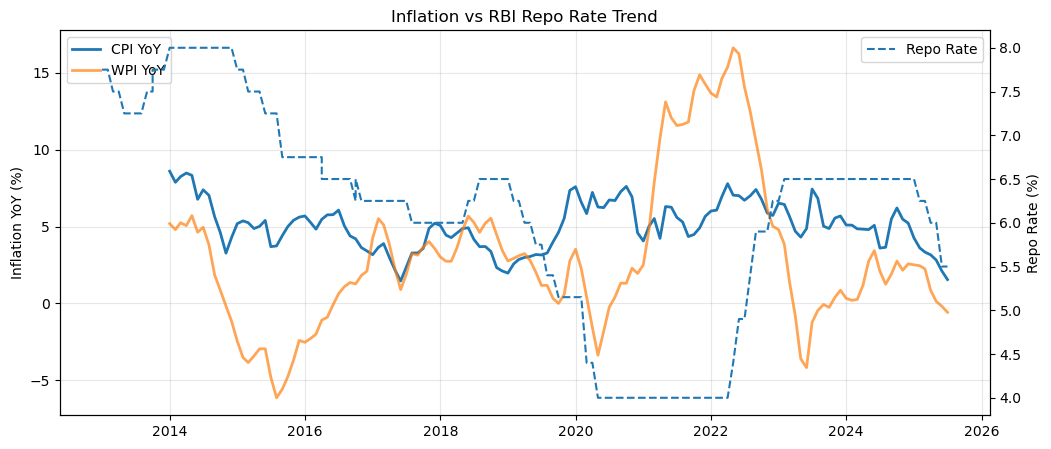

In [245]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(df["Month"], df["CPI_YoY"], label="CPI YoY", linewidth=2)
ax1.plot(df["Month"], df["WPI_YoY"], label="WPI YoY", linewidth=2, alpha=0.7)

ax1.set_ylabel("Inflation YoY (%)")
ax1.legend(loc="upper left")
ax1.grid(alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(df["Month"], df["Repo_Rate"], label="Repo Rate", linestyle="--")
ax2.set_ylabel("Repo Rate (%)")
ax2.legend(loc="upper right")

plt.title("Inflation vs RBI Repo Rate Trend")
plt.show()

- CPI YoY (consumer inflation) and WPI YoY (wholesale inflation) are shown along with the RBI Repo Rate (interest rate).
- The chart clearly demonstrates a lagged relationship — the repo rate typically changes after inflation shows persistent upward or downward movement.

# Inflation Volatility

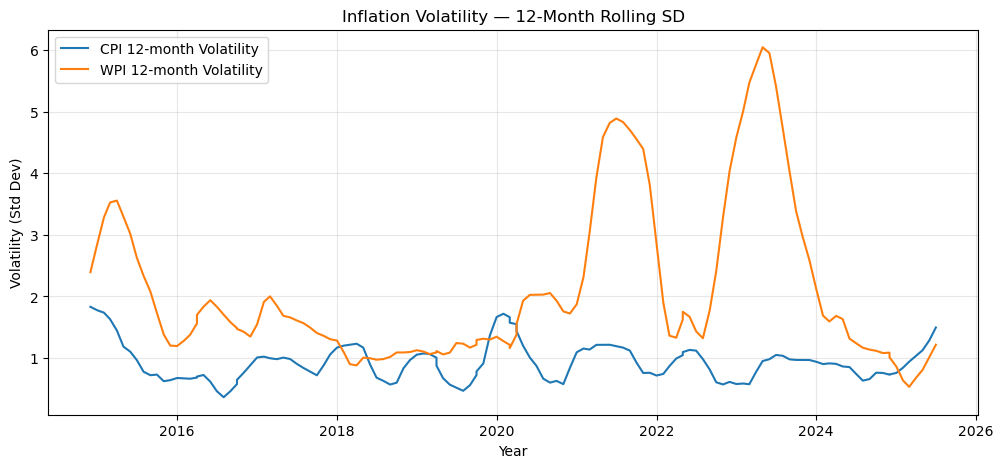

In [249]:
plt.figure(figsize=(12,5))
plt.plot(df["Month"], df["CPI_YoY"].rolling(12).std(), label="CPI 12-month Volatility")
plt.plot(df["Month"], df["WPI_YoY"].rolling(12).std(), label="WPI 12-month Volatility")
plt.title("Inflation Volatility — 12-Month Rolling SD")
plt.ylabel("Volatility (Std Dev)")
plt.xlabel("Year")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- Shows how stable or volatile inflation rates are over time.
- WPI volatility spikes are visible during COVID-19 and Russia-Ukraine War periods.
- CPI volatility remains more stable.

# “CPI vs WPI Inflation (YoY) — Annotated with Key Policy and Economic Shocks”

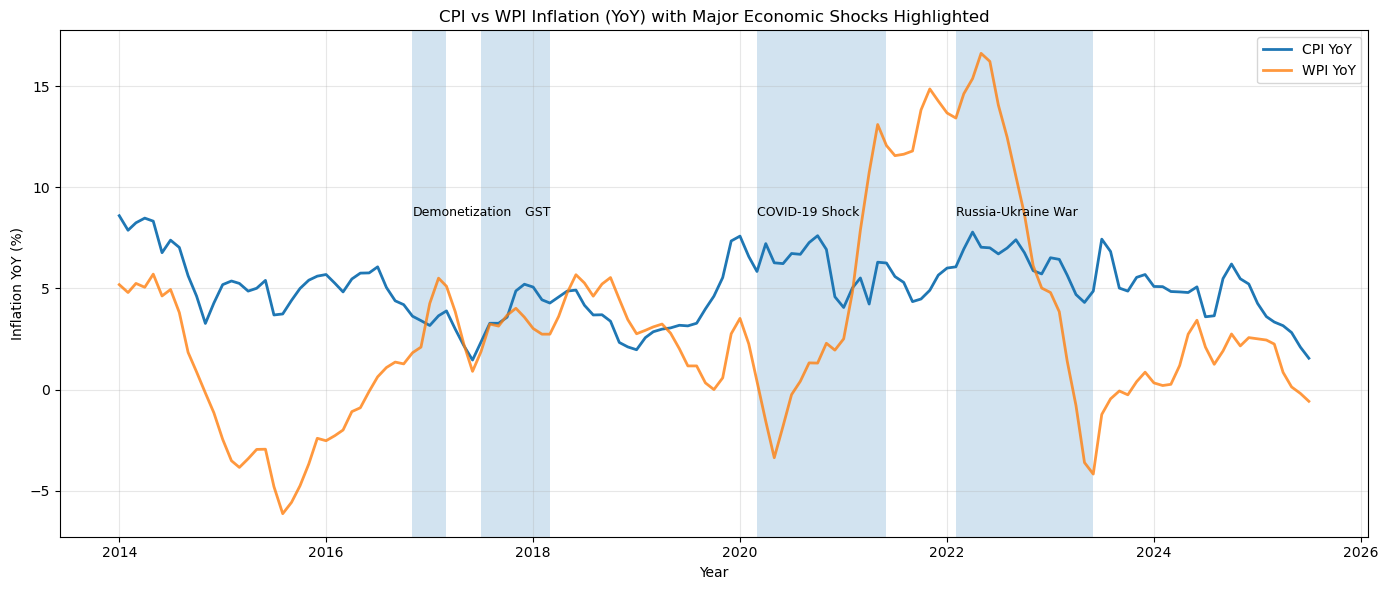

In [253]:
plt.figure(figsize=(14,6))
plt.plot(df["Month"], df["CPI_YoY"], label="CPI YoY", linewidth=2)
plt.plot(df["Month"], df["WPI_YoY"], label="WPI YoY", linewidth=2, alpha=0.8)

events = [
    ("2016-11-01", "2017-03-01", "Demonetization"),
    ("2017-07-01", "2018-03-01", "           GST"),
    ("2020-03-01", "2021-06-01", "COVID-19 Shock"),
    ("2022-02-01", "2023-06-01", "Russia-Ukraine War")
]
for start, end, label in events:
    plt.axvspan(pd.Timestamp(start), pd.Timestamp(end), alpha=0.2)
    plt.text(pd.Timestamp(start), df["CPI_YoY"].max(), label, fontsize=9)

plt.title("CPI vs WPI Inflation (YoY) with Major Economic Shocks Highlighted")
plt.xlabel("Year")
plt.ylabel("Inflation YoY (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- Each event period shows visible impact on inflation trends.
- Demonetization: demand contraction → lower inflation.
- COVID-19: supply chain disruption → high WPI spikes.
- Russia-Ukraine War: surge in energy prices → high inflation.

# Urban vs Rural CPI Inflation (YoY)

In [257]:
cpi_geo = CPI.groupby(["Month", "geo"])["yoy"].mean().unstack()

In [259]:
cpi_geo

geo,Combined,Rural,Urban
Month,,,
2013-01-01,NaN,NaN,NaN
2013-02-01,NaN,NaN,NaN
2013-03-01,NaN,NaN,NaN
2013-04-01,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN
...,...,...,...
2025-03-01,3.046667,2.944,3.230000
2025-04-01,3.161667,2.926,3.503333
2025-05-01,3.026667,2.842,3.221667


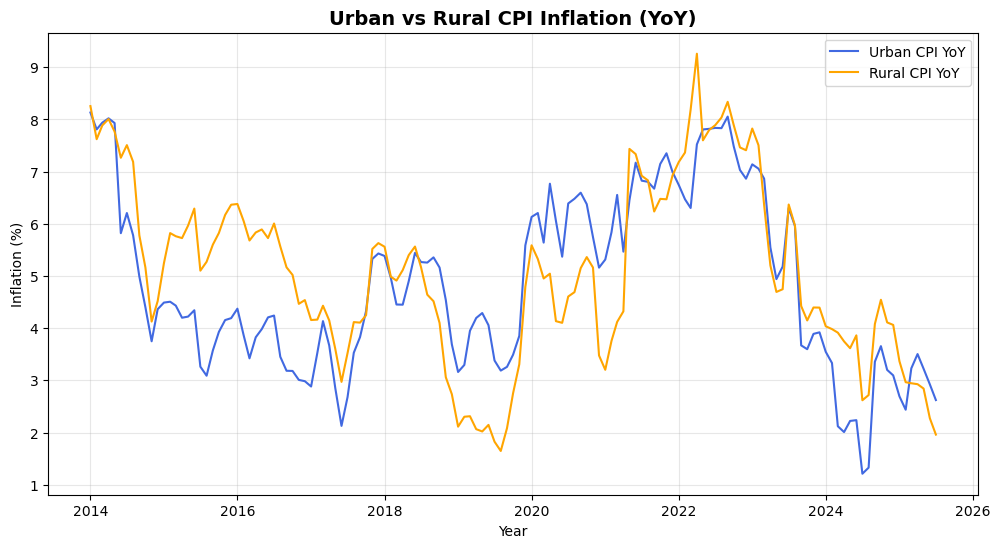

In [261]:
plt.figure(figsize=(12,6))
plt.plot(cpi_geo.index, cpi_geo["Urban"], label="Urban CPI YoY", color="royalblue")
plt.plot(cpi_geo.index, cpi_geo["Rural"], label="Rural CPI YoY", color="orange")

plt.title("Urban vs Rural CPI Inflation (YoY)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- Rural inflation tends to fluctuate more due to food and fuel dependency.
- Urban inflation is more stable, driven by services and housing.

# Food CPI vs overall CPI

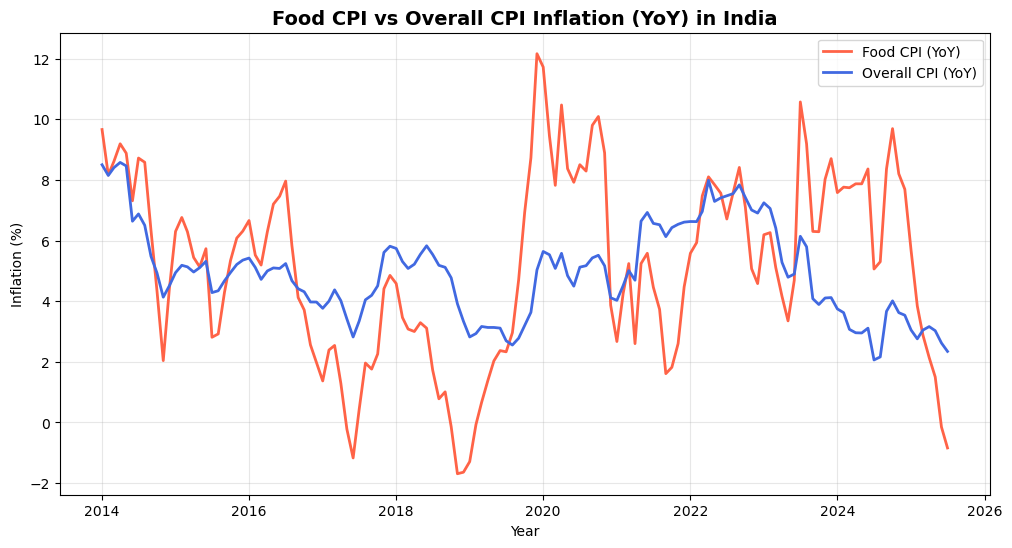

In [283]:
plt.figure(figsize=(12,6))

# Filter only combined CPI data
cpi_combined = CPI[CPI["geo"] == "Combined"]

# Get Food & Overall categories
cpi_food = cpi_combined[cpi_combined["category"] == "Food & beverages"]
cpi_overall = cpi_combined.groupby("Month")["yoy"].mean()  # headline CPI

# Plot
plt.plot(cpi_food["Month"], cpi_food["yoy"], label="Food CPI (YoY)", color="tomato", linewidth=2)
plt.plot(cpi_overall.index, cpi_overall.values, label="Overall CPI (YoY)", color="royalblue", linewidth=2)

plt.title("Food CPI vs Overall CPI Inflation (YoY) in India", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- Food CPI shows higher volatility due to weather, crop output, and supply shocks.
- Food inflation is the main driver of overall CPI volatility in India.

# WPI Food vs Overall WPI

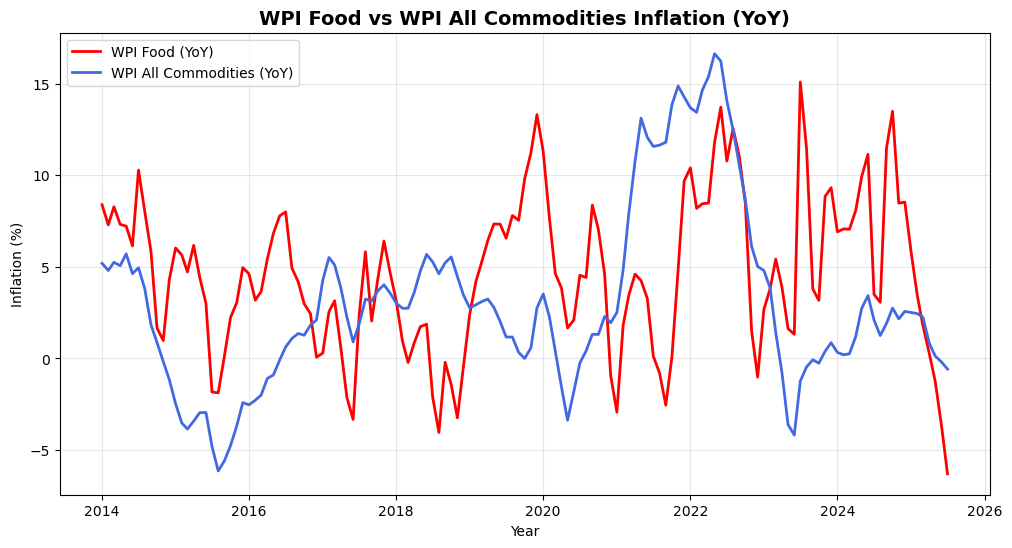

In [268]:
plt.figure(figsize=(12,6))
wpi_food = WPI[WPI["category"].str.contains("Food", case=False, na=False)]
wpi_all = WPI[WPI["category"].str.contains("All Commodities", case=False, na=False)]
plt.plot(wpi_food["Month"], wpi_food["yoy"], label="WPI Food (YoY)", color="red", linewidth=2)
plt.plot(wpi_all["Month"], wpi_all["yoy"], label="WPI All Commodities (YoY)", color="royalblue", linewidth=2)
plt.title("WPI Food vs WPI All Commodities Inflation (YoY)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- WPI Food inflation moves sharply.
- WPI Food prices are highly sensitive to international markets.

# Category- Wise Inflation

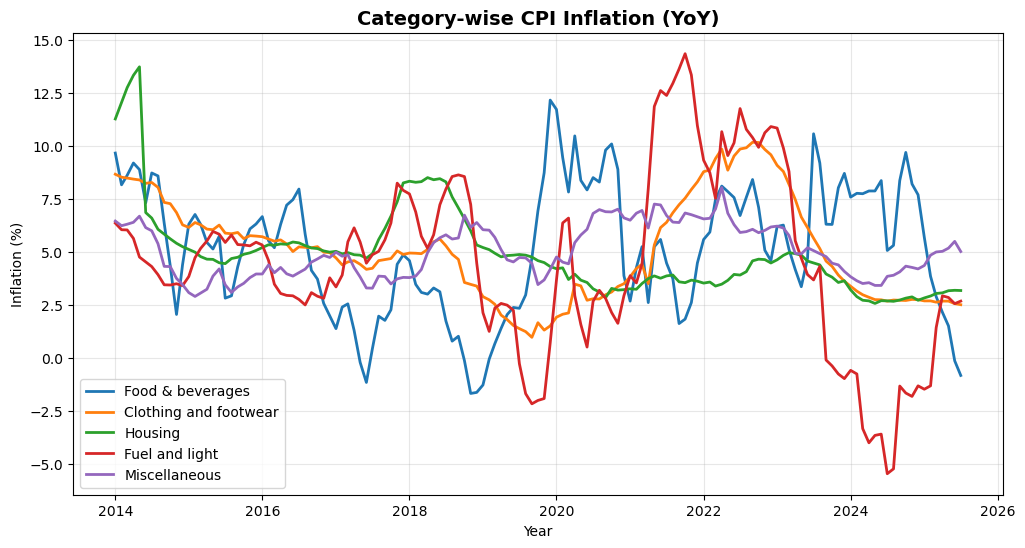

In [272]:
plt.figure(figsize=(12,6))
cpi_combined = CPI[CPI["geo"] == "Combined"]
categories = ["Food & beverages", "Clothing and footwear", "Housing", "Fuel and light", "Miscellaneous"]
for cat in categories:
    data = cpi_combined[cpi_combined["category"] == cat]
    plt.plot(data["Month"], data["yoy"], label=cat, linewidth=2)
plt.title("Category-wise CPI Inflation (YoY)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- Food & Fuel categories show higher volatility.
- Housing and Miscellaneous remain relatively stable.
- Post-2020, food and fuel inflation rose sharply.

# Conclusion

The analysis reveals that inflation in India exhibits cyclical patterns, with CPI generally remaining higher and more stable compared to WPI. Food inflation has been a key driver of overall CPI fluctuations, while WPI has shown sharper volatility during global supply shocks.

During the COVID-19 period, supply disruptions and higher commodity prices led to spikes in both CPI and WPI. Post-2022, the Russia–Ukraine conflict further amplified price pressures, particularly in food and fuel categories. Meanwhile, the RBI responded to rising inflation by progressively tightening monetary policy, increasing the Repo Rate to stabilize price levels.

Urban and rural inflation patterns moved closely, though rural areas often faced higher price volatility due to food and energy dependence. Category-wise, food, fuel, and housing emerged as the most influential components shaping overall inflation trends.

# Data Source

The data used in this analysis has been sourced from the Reserve Bank of India (RBI) Database on the Indian Economy (DBIE).

- Consumer Price Index (CPI)
- Wholesale Price Index (WPI)
- Repo Rate

The data covers the period from 2013 to 2025 (monthly) and has been cleaned, reshaped, and merged to enable consistent time-series analysis across variables.